[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CRCTransformers/deepdive-book/blob/main/Chapter-2-Machine-Translation.ipynb)

# Machine Translation Comparison: Attention vs. Transformer

In [2]:
!python -m spacy download fr

⚠ As of spaCy v3.0, shortcuts like 'fr' are deprecated. Please use the
full pipeline package name 'fr_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 52.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
!pip install ecco --only-binary=:all:

INFO: pip is looking at multiple versions of ecco to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of ecco to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.1 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resol

In [4]:
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [5]:
!pip uninstall torch

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Would remove:
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.11/dist-packages/functorch/*
    /usr/local/lib/python3.11/dist-packages/torch-2.6.0+cu124.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torch/*
    /usr/local/lib/python3.11/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.6.0+cu124


In [6]:
!pip install torch==2.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 859.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip show torch

Name: torch
Version: 2.3.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchtext, torchvision


In [8]:
from io import open
import unicodedata
import string
import re
import random
import os

import torch
from torch import nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab, build_vocab_from_iterator
from collections import Counter

from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import ecco

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

In [9]:
%%capture
!wget https://download.pytorch.org/tutorial/data.zip && unzip data.zip && rm data.zip

In [10]:
MAX_SENTENCE_LENGTH = 20
FILTER_TO_BASIC_PREFIXES = False
SAVE_DIR = os.path.join(".", "models")

ENCODER_EMBEDDING_DIM = 256
ENCODER_HIDDEN_SIZE = 256
DECODER_EMBEDDING_DIM = 256
DECODER_HIDDEN_SIZE = 256

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [12]:
if torch.cuda.is_available():
    !nvidia-smi

Sat May  3 01:01:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
with open('data/eng-fra.txt', encoding='utf-8') as f:
    lines = f.read().strip().split('\n')

print(f"{len(lines):,} English-French phrase pairs.\n")
print("~~~~~ Examples: ~~~~~")
for example in random.choices(lines, k=5):
    pair = example.split('\t')
    print(f"English:  {pair[0]}")
    print(f"French:   {pair[1]}")
    print()

135,842 English-French phrase pairs.

~~~~~ Examples: ~~~~~
English:  I am familiar with his music.
French:   Je suis familier de sa musique.

English:  He made her his secretary.
French:   Il a fait d'elle sa secrétaire.

English:  You seemed to like that.
French:   Vous avez semblé l'apprécier.

English:  We're getting closer.
French:   Nous nous approchons.

English:  Can you believe this is already happening?
French:   Pouvez-vous croire que ce soit déjà en train d'arriver ?



In [14]:
def unicodeToAscii(s):
    return ''.join(
      c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn'
    )

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"[^a-zA-Z.!?]+", " ", s)
    return s

In [15]:
def filterPair(p, max_length, prefixes):
    good_length = (len(p[0].split(' ')) < max_length) and (len(p[1].split(' ')) < max_length)
    if len(prefixes) == 0:
        return good_length
    else:
        return good_length and p[0].startswith(prefixes)

def filterPairs(pairs, max_length, prefixes=()):
    return [pair for pair in pairs if filterPair(pair, max_length, prefixes)]

In [16]:
def prepareData(lines, filter=False, reverse=False, max_length=10, prefixes=()):
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    print(f"Given {len(pairs):,} sentence pairs.")

    if filter:
        pairs = filterPairs(pairs, max_length=max_length, prefixes=prefixes)
        print(f"After filtering, {len(pairs):,} remain.")

    return pairs

In [17]:
basic_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re ",
    'are you', 'am i ',
    'were you', 'was i ',
    'where are', 'where is',
    'what is', 'what are'
)

In [18]:
pairs = prepareData(lines,
                    filter=True,
                    max_length=MAX_SENTENCE_LENGTH,
                    prefixes=basic_prefixes if FILTER_TO_BASIC_PREFIXES else ())

Given 135,842 sentence pairs.
After filtering, 135,284 remain.


## Prepare Data for Modeling
We now have to tokenize the text pairs to create numeric inputs for our embedding layers. We'll use tokenizers from `spaCy` accessed via the `torchtext` library.

In [19]:
fr_tokenizer = get_tokenizer('spacy', language='fr')
en_tokenizer = get_tokenizer('spacy', language='en')

/usr/local/lib/python3.11/dist-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "fr" could not be loaded, trying "fr_core_news_sm" instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(


In [20]:
SPECIALS = ['<unk>', '<pad>', '<bos>', '<eos>']

In [21]:
en_list = []
fr_list = []
en_counter = Counter()
fr_counter = Counter()
en_lengths = []
fr_lengths = []
for en, fr in pairs:
    en_toks = en_tokenizer(en)
    fr_toks = fr_tokenizer(fr)
    en_list += [en_toks]
    fr_list += [fr_toks]
    en_counter.update(en_toks)
    fr_counter.update(fr_toks)
    en_lengths.append(len(en_toks))
    fr_lengths.append(len(fr_toks))

en_vocab = build_vocab_from_iterator(en_list, specials=SPECIALS)
fr_vocab = build_vocab_from_iterator(fr_list, specials=SPECIALS)

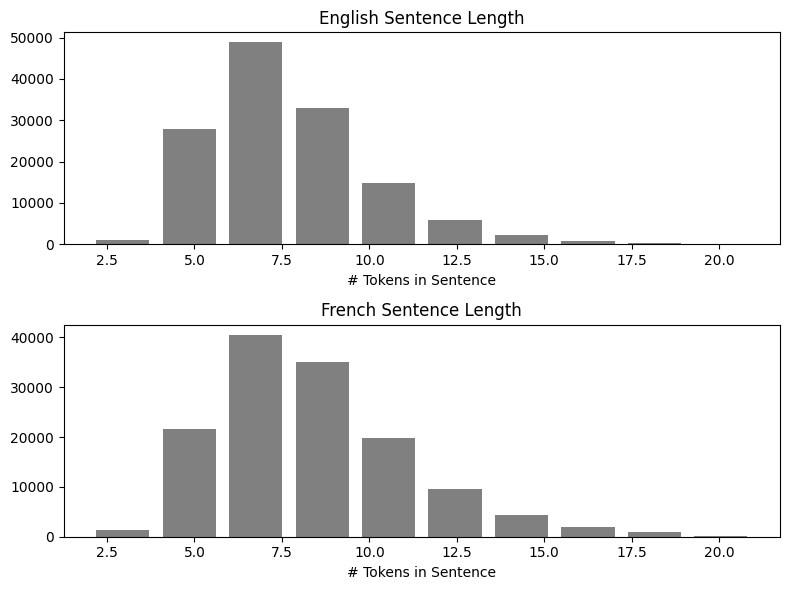

In [22]:
fig = plt.figure(figsize=(8, 6))
ax0 = fig.add_subplot(211)
ax0.hist(en_lengths, rwidth=0.8, color='gray')
ax0.set_title("English Sentence Length")
ax0.set_xlabel("# Tokens in Sentence")

ax1 = fig.add_subplot(212)
ax1.hist(fr_lengths, rwidth=0.8, color='gray')
ax1.set_title("French Sentence Length")
ax1.set_xlabel("# Tokens in Sentence")

plt.tight_layout()
plt.show()

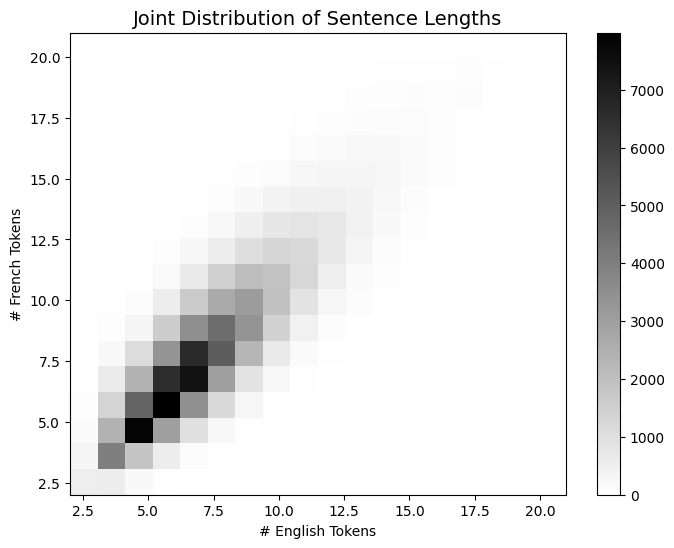

In [23]:
plt.figure(figsize=(8,6))
plt.hist2d(en_lengths, fr_lengths, bins=MAX_SENTENCE_LENGTH-2, cmap='binary')
plt.title("Joint Distribution of Sentence Lengths", fontsize=14)
plt.xlabel("# English Tokens")
plt.ylabel("# French Tokens")
plt.colorbar()
plt.show()

Most common words in the vocabularies

In [24]:
def plot_top_words(counter, k=20, ax=None):
    top_k = counter.most_common(k)
    words, freqs = zip(*reversed(top_k))

    if ax is None:
        plt.barh(words, freqs, color='gray')
    else:
        ax.barh(words, freqs, color='gray')

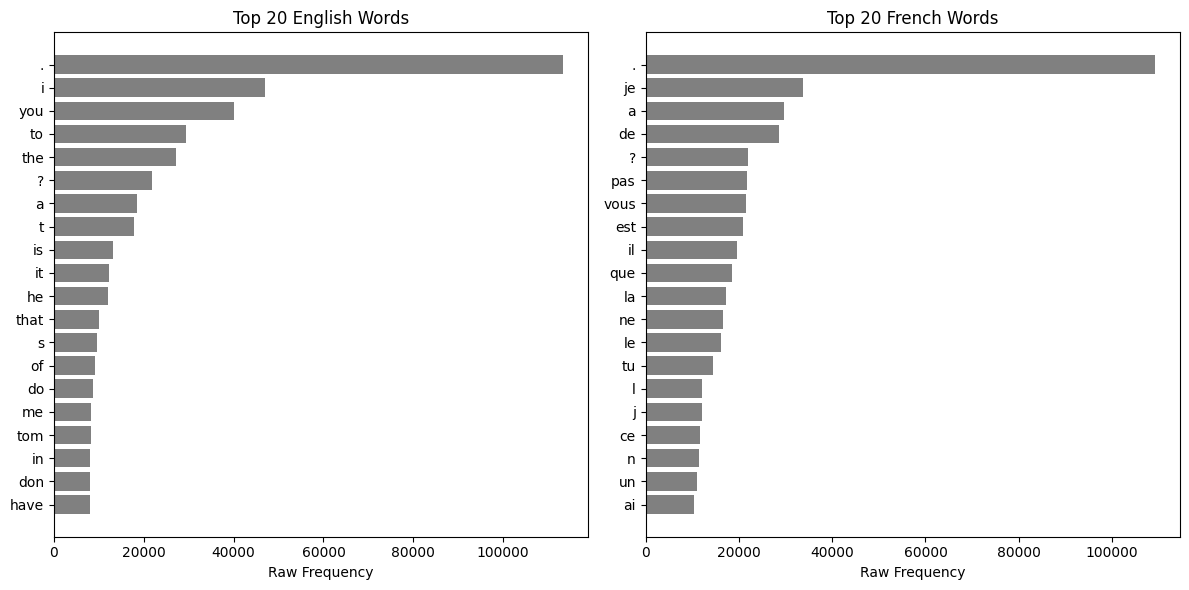

In [25]:
fig = plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(121)
plot_top_words(en_counter, ax=ax0)
ax0.set_title("Top 20 English Words")
ax0.set_xlabel("Raw Frequency")

ax1 = fig.add_subplot(122)
plot_top_words(fr_counter, ax=ax1)
ax1.set_title("Top 20 French Words")
ax1.set_xlabel("Raw Frequency")

plt.tight_layout()
plt.show()

In [26]:
VALID_PCT = 0.1
TEST_PCT  = 0.1

train_data = []
valid_data = []
test_data = []

random.seed(6547)
for (en, fr) in pairs:
    en_tensor_ = torch.tensor([en_vocab[token] for token in en_tokenizer(en)])
    fr_tensor_ = torch.tensor([fr_vocab[token] for token in fr_tokenizer(fr)])
    random_draw = random.random()
    if random_draw <= VALID_PCT:
        valid_data.append((en_tensor_, fr_tensor_))
    elif random_draw <= VALID_PCT + TEST_PCT:
        test_data.append((en_tensor_, fr_tensor_))
    else:
        train_data.append((en_tensor_, fr_tensor_))


print(f"""
  Training pairs: {len(train_data):,}
Validation pairs: {len(valid_data):,}
      Test pairs: {len(test_data):,}""")


  Training pairs: 108,111
Validation pairs: 13,648
      Test pairs: 13,525


In [27]:
PAD_IDX = en_vocab['<pad>']
BOS_IDX = en_vocab['<bos>']
EOS_IDX = en_vocab['<eos>']

for en_id, fr_id in zip(en_vocab.lookup_indices(SPECIALS), fr_vocab.lookup_indices(SPECIALS)):
  assert en_id == fr_id

In [28]:
def generate_batch(data_batch):
    '''
    Prepare English and French examples for batch-friendly modeling by appending
    BOS/EOS tokens to each, stacking the tensors, and filling trailing spaces of
    shorter sentences with the <pad> token. To be used as the collate_fn in the
    English-to-French DataLoader.

    Input:
    - data_batch, an iterable of (English, French) tuples from the datasets
      created above

    Outputs
    - en_batch: a (max length X batch size) tensor of English token IDs
    - fr_batch: a (max length X batch size) tensor of French token IDs
    '''
    en_batch, fr_batch = [], []
    for (en_item, fr_item) in data_batch:
        en_batch.append(torch.cat([torch.tensor([BOS_IDX]), en_item, torch.tensor([EOS_IDX])], dim=0))
        fr_batch.append(torch.cat([torch.tensor([BOS_IDX]), fr_item, torch.tensor([EOS_IDX])], dim=0))

    en_batch = pad_sequence(en_batch, padding_value=PAD_IDX, batch_first=False)
    fr_batch = pad_sequence(fr_batch, padding_value=PAD_IDX, batch_first=False)

    return en_batch, fr_batch

In [29]:
BATCH_SIZE = 16

train_iter = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=generate_batch)
valid_iter = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=generate_batch)
test_iter = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=generate_batch)

In [30]:
for i, (en_id, fr_id) in enumerate(train_iter):
    print('English:', ' '.join([en_vocab.lookup_token(idx) for idx in en_id[:, 0]]))
    print('French:', ' '.join([fr_vocab.lookup_token(idx) for idx in fr_id[:, 0]]))
    if i == 4:
        break
    else:
        print()

English: <bos> she left with her friends . <eos> <pad> <pad> <pad>
French: <bos> elle est partie avec ses amis . <eos> <pad> <pad> <pad> <pad>

English: <bos> she was quite eager in her studies . <eos> <pad> <pad> <pad> <pad>
French: <bos> elle etait assez motivee dans ses etudes . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

English: <bos> the only person who hasn t paid is you . <eos> <pad> <pad> <pad>
French: <bos> la seule personne qui n a pas paye c est toi . <eos> <pad> <pad> <pad>

English: <bos> if he had stayed at home that day he would not have met with disaster . <eos>
French: <bos> fut il reste chez lui ce jour la il n aurait pas connu le desastre . <eos>

English: <bos> she got married at seventeen . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
French: <bos> elle s est mariee a l age de dix sept ans . <eos> <pad> <pad> <pad> <pad> <pad> <pad>


## LSTM with Attention

### Model Classes

In [31]:
class BahdanauEncoder(nn.Module):
    def __init__(self, input_dim, embedding_dim, encoder_hidden_dim,
                 decoder_hidden_dim, dropout_p):
        super().__init__()
        self.input_dim = input_dim
        self.embedding_dim = embedding_dim
        self.encoder_hidden_dim = encoder_hidden_dim
        self.decoder_hidden_dim = decoder_hidden_dim
        self.dropout_p = dropout_p

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, encoder_hidden_dim, bidirectional=True)
        self.linear = nn.Linear(encoder_hidden_dim * 2, decoder_hidden_dim)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, x):
        '''
        Encode a source sentence.

        Input:
          - x: a (sequence length, batch size) tensor of token IDs in source language

        Output:
          - outputs: encoder outputs at each time step, given as a tensor of size
            (sequence length, batch size, encoder hidden dim * 2)
          - hidden: final hidden state from RNN, with directions concatenated and
            fed through linear layer; tensor of size (batch size, decoder hidden dim)
        '''

        embedded = self.dropout(self.embedding(x))
        outputs, hidden = self.gru(embedded)

        hidden = torch.tanh(self.linear(
            torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        ))

        return outputs, hidden

In [32]:
class BahdanauAttentionQKV(nn.Module):
    def __init__(self, hidden_size, query_size=None, key_size=None, dropout_p=0.15):
        super().__init__()
        self.hidden_size = hidden_size
        self.query_size = hidden_size if query_size is None else query_size

        # assume bidirectional encoder, but can specify otherwise
        self.key_size = 2*hidden_size if key_size is None else key_size

        self.query_layer = nn.Linear(self.query_size, hidden_size)
        self.key_layer = nn.Linear(self.key_size, hidden_size)
        self.energy_layer = nn.Linear(hidden_size, 1)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, hidden, encoder_outputs, src_mask=None):
        '''
        Calculate attention weights using query and key features, with
        an optional mask for input sequences.

        Inputs:
          - hidden: most recent RNN hidden state; (B, Dec)
          - encoder_outputs: RNN outputs at individual time steps with
            directions concatenated; (L, B, 2*Enc)
          - src_mask: boolean tensor of same size as source tokens (Src, B)
            where False denotes tokens to be ignored

        Outputs:
          - attention weights: (B, src) tensor of softmax attention
            weights to be applied to downstream values
        '''

        # (B, H)
        query_out = self.query_layer(hidden)

        # (Src, B, 2*H) --> (Src, B, H)
        key_out = self.key_layer(encoder_outputs)

        # (B, H) + (Src, B, H) = (Src, B, H)
        energy_input = torch.tanh(query_out + key_out)

        # (Src, B, H) --> (Src, B, 1) --> (Src, B)
        energies = self.energy_layer(energy_input).squeeze(2)

        # if a mask is provided, remove masked tokens from softmax calc
        if src_mask is not None:
            energies.data.masked_fill_(src_mask == 0, float("-inf"))

        # softmax over the length dimension
        weights = F.softmax(energies, dim=0)

        # return as (B, Src) as expected by later multiplication
        return weights.transpose(0, 1)

In [33]:
class BahdanauDecoder(nn.Module):
    def __init__(self, output_dim, embedding_dim, encoder_hidden_dim,
                 decoder_hidden_dim, attention, dropout_p):
        super().__init__()

        self.embedding_dim = embedding_dim
        self.output_dim = output_dim
        self.encoder_hidden_dim = encoder_hidden_dim
        self.decoder_hidden_dim = decoder_hidden_dim
        self.dropout_p = dropout_p

        self.embedding = nn.Embedding(output_dim, embedding_dim)
        self.attention = attention # allowing for custom attention
        self.gru = nn.GRU((encoder_hidden_dim * 2) + embedding_dim,
                          decoder_hidden_dim)
        self.out = nn.Linear((encoder_hidden_dim * 2) + embedding_dim + decoder_hidden_dim,
                             output_dim)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, input, hidden, encoder_outputs, src_mask=None):
        '''
        Decode an encoder's output.

        B: batch size
        S: source sentence length
        T: target sentence length
        O: output size (target vocab size)
        Enc: encoder hidden dim
        Dec: decoder hidden dim
        Emb: embedding dim

        Inputs:
          - input: a vector of length B giving the most recent decoded token
          - hidden: a (B, Dec) most recent RNN hidden state
          - encoder_outputs: (S, B, 2*Enc) sequence of outputs from encoder RNN

        Outputs:
          - output: logits for next token in the sequence (B, O)
          - hidden: a new (B, Dec) RNN hidden state
          - attentions: (B, S) attention weights for the current token over the source sentence
        '''

        # (B) --> (1, B)
        input = input.unsqueeze(0)

        embedded = self.dropout(self.embedding(input))

        attentions = self.attention(hidden, encoder_outputs, src_mask)

        # (B, S) --> (B, 1, S)
        a = attentions.unsqueeze(1)

        # (S, B, 2*Enc) --> (B, S, 2*Enc)
        encoder_outputs = encoder_outputs.transpose(0, 1)

        # weighted encoder representation
        # (B, 1, S) @ (B, S, 2*Enc) = (B, 1, 2*Enc)
        weighted = torch.bmm(a, encoder_outputs)

        # (B, 1, 2*Enc) --> (1, B, 2*Enc)
        weighted = weighted.transpose(0, 1)

        # concat (1, B, Emb) and (1, B, 2*Enc)
        # results in (1, B, Emb + 2*Enc)
        rnn_input = torch.cat((embedded, weighted), dim=2)

        output, hidden = self.gru(rnn_input, hidden.unsqueeze(0))

        assert (output == hidden).all()

        # get rid of empty leading dimensions
        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)

        # concatenate the pieces above
        # (B, Dec), (B, 2*Enc), and (B, Emb)
        # result is (B, Dec + 2*Enc + Emb)
        linear_input = torch.cat((output, weighted, embedded), dim=1)

        # (B, Dec + 2*Enc + Emb) --> (B, O)
        output = self.out(linear_input)

        return output, hidden.squeeze(0), attentions

In [34]:
class BahdanauSeq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()

        self.encoder = encoder.to(device)
        self.decoder = decoder.to(device)
        self.device = device
        self.tgt_vocab_size = decoder.output_dim

    def forward(self, src, tgt, src_mask=None, teacher_forcing_ratio=0.5, return_attentions=False):

        tgt_length, batch_size = tgt.shape

        # store decoder outputs
        outputs = torch.zeros(tgt_length, batch_size, self.tgt_vocab_size).to(self.device)
        # attentions = torch.zeros(tgt_length, batch_size, )

        encoder_outputs, hidden = self.encoder(src)
        hidden = hidden.squeeze(1) # B, 1, Enc --> B, Enc (if necessary)

        # start with <bos> as the decoder input
        decoder_input = tgt[0, :]
        attentions = []

        for t in range(1, tgt_length):
            decoder_output, hidden, attention = self.decoder(decoder_input, hidden, encoder_outputs, src_mask)
            outputs[t] = decoder_output
            teacher_force = random.random() < teacher_forcing_ratio
            top_token = decoder_output.max(1)[1]
            decoder_input = (tgt[t] if teacher_force else top_token)
            attentions.append(attention.unsqueeze(-1))

        if return_attentions:
            return outputs, torch.cat(attentions, dim=-1)
        else:
            return outputs

### Train Bahdanau seq2seq

In [35]:
class MultipleOptimizer(object):
    def __init__(self, *op):
        self.optimizers = op

    def zero_grad(self):
        for op in self.optimizers:
            op.zero_grad()

    def step(self):
        for op in self.optimizers:
            op.step()

In [36]:
def train(model, iterator, optimizer, loss_fn, device, clip=None):
    model.train()
    if model.device != device:
        model = model.to(device)

    epoch_loss = 0
    with tqdm(total=len(iterator), leave=False) as t:
        for i, (src, tgt) in enumerate(iterator):
            src_mask = (src != PAD_IDX).to(device)
            src = src.to(device)
            tgt = tgt.to(device)

            optimizer.zero_grad()

            output = model(src, tgt, src_mask)

            loss = loss_fn(output[1:].view(-1, output.shape[2]),
                           tgt[1:].view(-1))

            loss.backward()

            if clip is not None:
                nn.utils.clip_grad_norm_(model.parameters(), clip)

            optimizer.step()
            epoch_loss += loss.item()

            avg_loss = epoch_loss / (i+1)
            t.set_postfix(loss='{:05.3f}'.format(avg_loss),
                          ppl='{:05.3f}'.format(np.exp(avg_loss)))
            t.update()

    return epoch_loss / len(iterator)

In [37]:
def evaluate(model, iterator, loss_fn, device):
    model.eval()
    if model.device != device:
        model = model.to(device)

    epoch_loss = 0
    with torch.no_grad():
        with tqdm(total=len(iterator), leave=False) as t:
            for i, (src, tgt) in enumerate(iterator):
                src_mask = (src != PAD_IDX).to(device)
                src = src.to(device)
                tgt = tgt.to(device)

                output = model(src, tgt, src_mask, teacher_forcing_ratio=0)
                loss = loss_fn(output[1:].view(-1, output.shape[2]),
                               tgt[1:].view(-1))

                epoch_loss += loss.item()

                avg_loss = epoch_loss / (i+1)
                t.set_postfix(loss='{:05.3f}'.format(avg_loss),
                              ppl='{:05.3f}'.format(np.exp(avg_loss)))
                t.update()

    return epoch_loss / len(iterator)

In [38]:
enc = BahdanauEncoder(input_dim=len(en_vocab),
                      embedding_dim=ENCODER_EMBEDDING_DIM,
                      encoder_hidden_dim=ENCODER_HIDDEN_SIZE,
                      decoder_hidden_dim=DECODER_HIDDEN_SIZE,
                      dropout_p=0.15)

attn = BahdanauAttentionQKV(DECODER_HIDDEN_SIZE)

dec = BahdanauDecoder(output_dim=len(fr_vocab),
                      embedding_dim=DECODER_EMBEDDING_DIM,
                      encoder_hidden_dim=ENCODER_HIDDEN_SIZE,
                      decoder_hidden_dim=DECODER_HIDDEN_SIZE,
                      attention=attn,
                      dropout_p=0.15)

In [39]:
seq2seq = BahdanauSeq2Seq(enc, dec, device)

In [40]:
def count_params(model, return_int=False):
    params = sum([torch.prod(torch.tensor(x.shape)).item() for x in model.parameters() if x.requires_grad])
    if return_int:
        return params
    else:
        print("There are {:,} trainable parameters in this model.".format(params))

In [41]:
count_params(seq2seq)

There are 32,361,414 trainable parameters in this model.


In [42]:
enc_optim = torch.optim.AdamW(seq2seq.encoder.parameters(), lr=1e-4)
dec_optim = torch.optim.AdamW(seq2seq.decoder.parameters(), lr=1e-4)
optims = MultipleOptimizer(enc_optim, dec_optim)
loss_fn = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

In [1]:
N_EPOCHS = 20
CLIP = 10 # clipping value, or None to prevent gradient clipping
EARLY_STOPPING_EPOCHS = 2

if not os.path.exists(SAVE_DIR):
    print(f"Creating directory {SAVE_DIR}")
    os.mkdir(SAVE_DIR)

model_path = os.path.join(SAVE_DIR, 'bahdanau_en_fr.pt')
bahdanau_metrics = {}
best_valid_loss = float("inf")
early_stopping_count = 0
for epoch in tqdm(range(N_EPOCHS), leave=False, desc="Epoch"):
    train_loss = train(seq2seq, train_iter, optims, loss_fn, device, clip=CLIP)
    valid_loss = evaluate(seq2seq, valid_iter, loss_fn, device)

    if valid_loss < best_valid_loss:
        tqdm.write(f"Checkpointing at epoch {epoch + 1}")
        best_valid_loss = valid_loss
        torch.save(seq2seq.state_dict(), model_path)
        early_stopping_count = 0
    else:
        early_stopping_count += 1

    bahdanau_metrics[epoch+1] = dict(
        train_loss = train_loss,
        train_ppl = np.exp(train_loss),
        valid_loss = valid_loss,
        valid_ppl = np.exp(valid_loss)
    )

    if early_stopping_count == EARLY_STOPPING_EPOCHS:
        tqdm.write(f"Early stopping triggered in epoch {epoch + 1}")
        break

NameError: name 'os' is not defined

In [ ]:
seq2seq.load_state_dict(torch.load(model_path, map_location=device))

In [ ]:
bahdanau_metrics_df = pd.DataFrame(bahdanau_metrics).T

plt.figure(figsize=(10,6))
plt.plot(bahdanau_metrics_df['train_loss'], label="Training", color='gray', linestyle='solid', lw=2.5)
plt.plot(bahdanau_metrics_df['valid_loss'], label="Validation", color='gray', linestyle='dashed', lw=2.5)
plt.legend()
plt.title("Bahdanau Attention: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(bahdanau_metrics_df['train_ppl'], label="Training", color='gray', linestyle='solid', lw=2.5)
plt.plot(bahdanau_metrics_df['valid_ppl'], label="Validation", color='gray', linestyle='dashed', lw=2.5)
plt.legend()
plt.title("Bahdanau Attention: Perplexity")
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.show()

In [ ]:
best_valid_loss

In [ ]:
def predict_text(model, text, device=device, src_vocab=en_vocab, src_tokenizer=en_tokenizer, tgt_vocab=fr_vocab):
    model.eval()
    with torch.no_grad():
        input_ids = [src_vocab[token] for token in src_tokenizer(text)]
        input_ids = [BOS_IDX] + input_ids + [EOS_IDX]
        input_tensor = torch.tensor(input_ids).to(device).unsqueeze(1) # add fake batch dim
        max_len = 2*len(input_ids)
        encoder_outputs, hidden = model.encoder(input_tensor)

        output = torch.tensor([BOS_IDX]).to(device)

        decoder_outputs = torch.zeros(max_len, 1, len(tgt_vocab)).to(device)

        decoded_words = []
        decoder_attentions = torch.zeros(max_len, len(input_ids))
        for t in range(0, max_len):
            output, hidden, attn = model.decoder(output, hidden, encoder_outputs)
            decoder_attentions[t] = attn.data
            decoder_outputs[t] = output
            output = output.argmax(1)

            if output.item() == EOS_IDX:
                decoded_words.append('<eos>')
                break
            else:
                decoded_words.append(tgt_vocab.lookup_token(output.item()))

        output_sentence = ' '.join(decoded_words)
        return output_sentence, decoder_attentions[:(t+1)]

def show_attention(input_sentence, output_sentence, attentions, figsize=(8,6)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='gray')
    fig.colorbar(cax)

    src = ['', '<bos>'] + input_sentence.split(' ') + ['<eos>']
    tgt = [''] + output_sentence.split(' ')
    ax.set_xticklabels(src, rotation=90)
    ax.set_yticklabels(tgt)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

def predict_and_show_attention(sentence, model, device):
    result, attentions = predict_text(model, sentence, device)

    print("Input  >>>", sentence)
    print("Output >>>", result)

    show_attention(sentence, result, attentions)

In [ ]:
predict_and_show_attention("i am going to the store", seq2seq, device)

In [ ]:
predict_and_show_attention("how long will you be here ?", seq2seq, device)

In [ ]:
predict_and_show_attention("can we please go to the library ?", seq2seq, device)

In [ ]:
if not FILTER_TO_BASIC_PREFIXES:
  predict_and_show_attention("her family moved away last year .", seq2seq, device)

In [ ]:
if not FILTER_TO_BASIC_PREFIXES:
  predict_and_show_attention("two thousand people fit into this hall .", seq2seq, device)

In [ ]:
if not FILTER_TO_BASIC_PREFIXES:
  predict_and_show_attention("the poor young man finally became a great artist .", seq2seq, device)

## Transformer Encoder-Decoder

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout_p=0.1, max_len=100):
        super().__init__()

        self.dropout = nn.Dropout(dropout_p)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)


class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, num_attention_heads,
                 num_encoder_layers, num_decoder_layers, dim_feedforward,
                 max_seq_length, pos_dropout, transformer_dropout):
        super().__init__()
        self.d_model = d_model
        self.embed_src = nn.Embedding(input_dim, d_model)
        self.embed_tgt = nn.Embedding(output_dim, d_model)
        self.pos_enc = PositionalEncoding(d_model, pos_dropout, max_seq_length)

        self.transformer = nn.Transformer(d_model, num_attention_heads, num_encoder_layers,
                                          num_decoder_layers, dim_feedforward, transformer_dropout)
        self.output = nn.Linear(d_model, output_dim)

    def forward(self,
                src=None,
                tgt=None,
                src_mask=None,
                tgt_mask=None,
                src_key_padding_mask=None,
                tgt_key_padding_mask=None,
                memory_key_padding_mask=None,
                src_embeds=None,
                tgt_embeds=None):

        if (src_embeds is None) and (src is not None):
            if (tgt_embeds is None) and (tgt is not None):
                src_embeds, tgt_embeds = self._embed_tokens(src, tgt)
        elif (src_embeds is not None) and (src is not None):
            raise ValueError("Must specify exactly one of src and src_embeds")
        elif (src_embeds is None) and (src is None):
            raise ValueError("Must specify exactly one of src and src_embeds")
        elif (tgt_embeds is not None) and (tgt is not None):
            raise ValueError("Must specify exactly one of tgt and tgt_embeds")
        elif (tgt_embeds is None) and (tgt is None):
            raise ValueError("Must specify exactly one of tgt and tgt_embeds")

        output = self.transformer(src_embeds,
                                  tgt_embeds,
                                  tgt_mask=tgt_mask,
                                  src_key_padding_mask=src_key_padding_mask,
                                  tgt_key_padding_mask=tgt_key_padding_mask,
                                  memory_key_padding_mask=memory_key_padding_mask)

        return self.output(output)

    def _embed_tokens(self, src, tgt):
        src_embeds = self.embed_src(src) * np.sqrt(self.d_model)
        tgt_embeds = self.embed_tgt(tgt) * np.sqrt(self.d_model)

        src_embeds = self.pos_enc(src_embeds)
        tgt_embeds = self.pos_enc(tgt_embeds)
        return src_embeds, tgt_embeds

In [ ]:
def train_transformer(model, iterator, optimizer, loss_fn, device, clip=None):
    model.train()

    epoch_loss = 0
    with tqdm(total=len(iterator), leave=False) as t:
        for i, (src, tgt) in enumerate(iterator):
            src = src.to(device)
            tgt = tgt.to(device)

            # Create tgt_inp and tgt_out (which is tgt_inp but shifted by 1)
            tgt_inp, tgt_out = tgt[:-1, :], tgt[1:, :]

            tgt_mask = model.transformer.generate_square_subsequent_mask(tgt_inp.size(0)).to(device)
            src_key_padding_mask = (src == PAD_IDX).transpose(0, 1)
            tgt_key_padding_mask = (tgt_inp == PAD_IDX).transpose(0, 1)
            memory_key_padding_mask = src_key_padding_mask.clone()

            optimizer.zero_grad()

            output = model(src=src, tgt=tgt_inp,
                           tgt_mask=tgt_mask,
                           src_key_padding_mask = src_key_padding_mask,
                           tgt_key_padding_mask = tgt_key_padding_mask,
                           memory_key_padding_mask = memory_key_padding_mask)

            loss = loss_fn(output.view(-1, output.shape[2]),
                           tgt_out.view(-1))

            loss.backward()

            if clip is not None:
                nn.utils.clip_grad_norm_(model.parameters(), clip)

            optimizer.step()
            epoch_loss += loss.item()

            avg_loss = epoch_loss / (i+1)
            t.set_postfix(loss='{:05.3f}'.format(avg_loss),
                          ppl='{:05.3f}'.format(np.exp(avg_loss)))
            t.update()

    return epoch_loss / len(iterator)

def evaluate_transformer(model, iterator, loss_fn, device):
    model.eval()

    epoch_loss = 0
    with torch.no_grad():
        with tqdm(total=len(iterator), leave=False) as t:
            for i, (src, tgt) in enumerate(iterator):
                src = src.to(device)
                tgt = tgt.to(device)

                # Create tgt_inp and tgt_out (which is tgt_inp but shifted by 1)
                tgt_inp, tgt_out = tgt[:-1, :], tgt[1:, :]

                tgt_mask = model.transformer.generate_square_subsequent_mask(tgt_inp.size(0)).to(device)
                src_key_padding_mask = (src == PAD_IDX).transpose(0, 1)
                tgt_key_padding_mask = (tgt_inp == PAD_IDX).transpose(0, 1)
                memory_key_padding_mask = src_key_padding_mask.clone()

                output = model(src=src, tgt=tgt_inp,
                               tgt_mask=tgt_mask,
                               src_key_padding_mask = src_key_padding_mask,
                               tgt_key_padding_mask = tgt_key_padding_mask,
                               memory_key_padding_mask = memory_key_padding_mask)

                loss = loss_fn(output.view(-1, output.shape[2]),
                               tgt_out.view(-1))

                epoch_loss += loss.item()

                avg_loss = epoch_loss / (i+1)
                t.set_postfix(loss='{:05.3f}'.format(avg_loss),
                              ppl='{:05.3f}'.format(np.exp(avg_loss)))
                t.update()

    return epoch_loss / len(iterator)

In [ ]:
transformer = TransformerModel(input_dim=len(en_vocab),
                             output_dim=len(fr_vocab),
                             d_model=256,
                             num_attention_heads=8,
                             num_encoder_layers=6,
                             num_decoder_layers=6,
                             dim_feedforward=2048,
                             max_seq_length=32,
                             pos_dropout=0.15,
                             transformer_dropout=0.3)

transformer = transformer.to(device)

In [ ]:
count_params(transformer)

In [ ]:
xf_optim = torch.optim.AdamW(transformer.parameters(), lr=1e-4)

In [ ]:
%%time
N_EPOCHS = 50
CLIP = 15 # clipping value, or None to prevent gradient clipping
EARLY_STOPPING_EPOCHS = 5

model_path = os.path.join(SAVE_DIR, 'transformer_en_fr.pt')
transformer_metrics = {}
best_valid_loss = float("inf")
early_stopping_count = 0
for epoch in tqdm(range(N_EPOCHS), desc="Epoch"):
    train_loss = train_transformer(transformer, train_iter, xf_optim, loss_fn, device, clip=CLIP)
    valid_loss = evaluate_transformer(transformer, valid_iter, loss_fn, device)

    if valid_loss < best_valid_loss:
        tqdm.write(f"Checkpointing at epoch {epoch + 1}")
        best_valid_loss = valid_loss
        torch.save(transformer.state_dict(), model_path)
        early_stopping_count = 0
    elif epoch > EARLY_STOPPING_EPOCHS:
        early_stopping_count += 1

    transformer_metrics[epoch+1] = dict(
        train_loss = train_loss,
        train_ppl = np.exp(train_loss),
        valid_loss = valid_loss,
        valid_ppl = np.exp(valid_loss)
    )

    if early_stopping_count == EARLY_STOPPING_EPOCHS:
        tqdm.write(f"Early stopping triggered in epoch {epoch + 1}")
        break

In [ ]:
transformer.load_state_dict(torch.load(model_path, map_location=device))

In [ ]:
transformer_metrics_df = pd.DataFrame(transformer_metrics).T

plt.figure(figsize=(10,6))
plt.plot(transformer_metrics_df['train_loss'], label="Training", color='gray', linestyle='solid', lw=2.5)
plt.plot(transformer_metrics_df['valid_loss'], label="Validation", color='gray', linestyle='dashed', lw=2.5)
plt.legend()
plt.title("Transformer: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(transformer_metrics_df['train_ppl'], label="Training", color='gray', linestyle='solid', lw=2.5)
plt.plot(transformer_metrics_df['valid_ppl'], label="Validation", color='gray', linestyle='dashed', lw=2.5)
plt.legend()
plt.title("Transformer: Perplexity")
plt.xlabel("Epoch")
plt.ylabel("Perplexity")
plt.show()

In [ ]:
best_valid_loss

In [ ]:
def predict_transformer(text, model,
                        src_vocab=en_vocab,
                        src_tokenizer=en_tokenizer,
                        tgt_vocab=fr_vocab,
                        device=device):

    input_ids = [src_vocab[token] for token in src_tokenizer(text)]
    input_ids = [BOS_IDX] + input_ids + [EOS_IDX]

    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(input_ids).to(device).unsqueeze(1) # add fake batch dim

        causal_out = torch.ones(MAX_SENTENCE_LENGTH, 1).long().to(device) * BOS_IDX
        for t in range(1, MAX_SENTENCE_LENGTH):
            decoder_output = transformer(input_tensor, causal_out[:t, :])[-1, :, :]
            next_token = decoder_output.data.topk(1)[1].squeeze()
            causal_out[t, :] = next_token
            if next_token.item() == EOS_IDX:
                break

        pred_words = [tgt_vocab.lookup_token(tok.item()) for tok in causal_out.squeeze(1)[1:(t)]]
        return " ".join(pred_words)

In [ ]:
predict_transformer("she is not my mother .", transformer)

In [ ]:
predict_transformer("i would go anywhere with you .", transformer)

In [ ]:
transformer = transformer.to('cpu')

In [ ]:
def _one_hot(token_ids, vocab_size, device=device):
    return torch.zeros(token_ids.size(0), vocab_size).to(device).scatter_(1, token_ids, 1.)

def get_embeds(embedding_matrix, position_embedding_layer, input_ids, device=device):
    vocab_size = embedding_matrix.size(0)
    one_hot_tensor = _one_hot(input_ids, vocab_size, device)

    token_ids_tensor_one_hot = one_hot_tensor.to(device).clone().requires_grad_(True)
    inputs_embeds = torch.matmul(token_ids_tensor_one_hot, embedding_matrix)
    inputs_embeds = position_embedding_layer(inputs_embeds.unsqueeze(1))
    return inputs_embeds, token_ids_tensor_one_hot

def predict_and_visualize_transformer(input_text, model=transformer,
                                      src_tokenizer=en_tokenizer,
                                      tgt_tokenizer=fr_tokenizer,
                                      src_vocab=en_vocab,
                                      tgt_vocab=fr_vocab,
                                      max_length=MAX_SENTENCE_LENGTH,
                                      device=device):
    input_text = normalizeString(input_text)
    input_tokens = ['<bos>'] + src_tokenizer(input_text) + ['<eos>']
    input_ids = [src_vocab[token] for token in input_tokens]
    input_tensor = torch.tensor(input_ids).to(device).unsqueeze(1).to(device)

    grads = []
    i = 0
    gen_tensor = torch.tensor([BOS_IDX]).unsqueeze(1).to(device)
    while i < max_length:
        # get embeddings and predict
        src_key_padding_mask = (input_tensor == PAD_IDX).transpose(0, 1).to(device)
        tgt_key_padding_mask = (gen_tensor == PAD_IDX).transpose(0, 1).to(device)

        src_embed, token_tensor_one_hot = get_embeds(model.embed_src.weight, model.pos_enc, input_tensor, device)
        tgt_embed, _ = get_embeds(model.embed_tgt.weight, model.pos_enc, gen_tensor, device)
        logits = model(src_embeds=src_embed.to(device),
                       tgt_embeds=tgt_embed.to(device),
                       src_key_padding_mask=src_key_padding_mask,
                       memory_key_padding_mask=src_key_padding_mask,
                       tgt_mask = model.transformer.generate_square_subsequent_mask(gen_tensor.size(0)).to(device),
                       tgt_key_padding_mask=tgt_key_padding_mask)

        # extract next-word logits
        next_logits = logits[-1].squeeze()
        pred_id = next_logits.argmax()
        pred_logit = next_logits.max()

        # get gradient-based saliency for this token wrt input sequence
        saliency = ecco.attribution.compute_saliency_scores(pred_logit,
                                                            token_tensor_one_hot,
                                                            src_embed)
        grads.append(saliency['gradient'])

        # update generated sequence with new token
        gen_tensor = torch.cat([gen_tensor, pred_id.unsqueeze(0).unsqueeze(1)]).to(device)

        i += 1

        if pred_id == EOS_IDX:
            break
        if i == max_length:
            break

    gen_tokens = [tgt_vocab.lookup_token(i) for i in gen_tensor.squeeze()]
    grad_array = np.stack(grads)

    # plot it
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    m = ax.matshow(grad_array, cmap='gray')
    plt.xticks(range(grad_array.shape[1]), input_tokens, rotation=45, fontsize=12)
    plt.yticks(range(grad_array.shape[0]), gen_tokens[1:], fontsize=12)
    plt.colorbar(m)
    plt.tight_layout()
    plt.show()

In [ ]:
predict_and_visualize_transformer("I am going to the store.", device='cpu')

In [ ]:
predict_and_visualize_transformer("How long will you be here?", device='cpu')

In [ ]:
predict_and_visualize_transformer("Can we please go to the library?", device='cpu')

In [ ]:
if not FILTER_TO_BASIC_PREFIXES:
  predict_and_visualize_transformer("Her family moved away last year.", device='cpu')

In [ ]:
if not FILTER_TO_BASIC_PREFIXES:
  predict_and_visualize_transformer("Two thousand people fit into this hall.", device='cpu')

In [ ]:
if not FILTER_TO_BASIC_PREFIXES:
  predict_and_visualize_transformer("The poor young man finally became a great artist.", device='cpu')

## Test Set Evaluation

In [ ]:
test_loss = {}
test_loss['Bahdanau RNN'] = evaluate(seq2seq, test_iter, loss_fn, device)
test_loss['Transformer'] = evaluate_transformer(transformer, test_iter, loss_fn, device)

In [ ]:
test_ppl = {k:np.exp(v) for k, v in test_loss.items()}

In [ ]:
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(121)
ax0.bar(test_loss.keys(), test_loss.values(), color='gray')
ax0.set_title("Test Set Loss")
ax0.set_ylabel("Cross-Entropy Loss")

ax1 = fig.add_subplot(122)
ax1.bar(test_ppl.keys(), test_ppl.values(), color='gray')
ax1.set_title("Test Set Perplexity")
ax1.set_ylabel("Perplexity")
plt.show()

### Old Visuals

Keeping old code just in case

In [ ]:
def plot_metrics(metrics, title, chart_filter=''):
    data = pd.DataFrame(metrics).T
    data = data[list(filter(re.compile('.*'+chart_filter + '.*').match,
                         list(data.columns.values)))]
    data.plot(figsize=(10,6), title=title).legend(bbox_to_anchor=(1, 1))

In [ ]:
plot_metrics(bahdanau_metrics, "Bahdanau Attention: Loss", "loss")
plot_metrics(bahdanau_metrics, "Bahdanau Attention: Perplexity", "ppl")

In [ ]:
plot_metrics(transformer_metrics, "Transformer: Loss", "loss")
plot_metrics(transformer_metrics, "Transformer: Perplexity", "ppl")